Ce notebook montre comment utiliser la librairie CIFAR-10 pour charger les données, extraire des caractéristiques, entraîner différents modèles, faire des prédictions et évaluer les performances du modèle.

# Ajouter le chemin du répertoire parent de cifar10_classification

In [10]:
import os 
import sys
project_path = os.path.abspath('..')
if project_path not in sys.path:
    sys.path.append(project_path)
print(project_path)

/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar


# Setup and Import necessary libraries

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from cifar10_classification.config import DATA_DIR, MODEL_TYPES, LABEL_NAMES, IMG_SIZE
from cifar10_classification.dataset import load_cifar10, prepare_data
from cifar10_classification.features import extract_features
from cifar10_classification.modeling.train import *
from cifar10_classification.modeling.predict import predict_model, evaluate_model
from cifar10_classification.plots import plot_sample_images, plot_confusion_matrix, plot_roc_curve


Data Loading and Preparation
oad CIFAR-10 data

In [12]:
# 1. Chargement et préparation des données
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data()
print("Data loaded successfully")

Data loaded successfully


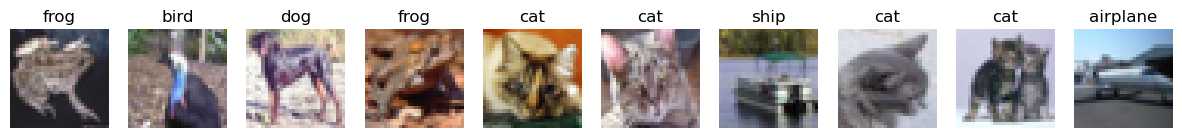

In [13]:
# Plot some sample images
plot_sample_images(X_train, y_train, LABEL_NAMES)

Feature Extraction
Extract HOG features from the training, validation, and test datasets

In [14]:
X_train_hog = extract_features(X_train, method='flatten')#.astype(np.float32)
X_val_hog = extract_features(X_val, method='flatten')#.astype(np.float32)
X_test_hog = extract_features(X_test, method='flatten')#.astype(np.float32)
print("Features extracted successfully")

Features extracted successfully


In [15]:
# Model Training and Evaluation
results = {}
i = 0
for model_type in MODEL_TYPES:
    i += 1 # just to limit the number of models trained
    if i == 3:
        break
    print(f"Training and evaluating model: {model_type}")
    
    # Train the model
    model, pred = train_classifier(X_train_hog, y_train, X_val_hog, y_val, model_type=model_type)
    
    # Evaluate the model
    #y_pred = predict_model(model, X_test_hog)
    accuracy, report, cm = evaluate_model(model, X_val_hog, y_val)
    
    # Store the results
    results[model_type] = {
        "model": model,
        "accuracy": accuracy,
        "confusion_matrix": cm,
        "predictions": pred,
    }
    
    print(f"Model {model_type} achieved an accuracy of {accuracy:.2f}")

Training and evaluating model: logistic
Model logistic achieved an accuracy of 0.29
Training and evaluating model: random_forest
Model random_forest achieved an accuracy of 0.10


Results Visualization
Plot confusion matrix and ROC curves for each model

Confusion Matrix for logistic
Normalized confusion matrix
[[0.57142857 0.0061665  0.0020555  0.0020555  0.004111   0.01130524
  0.004111   0.02055498 0.33710175 0.04110997]
 [0.19509704 0.18794688 0.00306435 0.0040858  0.00715015 0.04085802
  0.00715015 0.02860061 0.33094995 0.19509704]
 [0.32524272 0.00873786 0.09514563 0.01553398 0.04466019 0.12135922
  0.02330097 0.10097087 0.21941748 0.04563107]
 [0.30009775 0.01759531 0.01955034 0.04789834 0.01661779 0.22189638
  0.01564027 0.05180841 0.24828935 0.06060606]
 [0.24437299 0.00857449 0.06323687 0.01393355 0.1221865  0.1318328
  0.0471597  0.12861736 0.19614148 0.04394427]
 [0.24926108 0.01871921 0.02660099 0.02463054 0.02561576 0.26699507
  0.01182266 0.06896552 0.2591133  0.04827586]
 [0.18273092 0.01004016 0.03514056 0.04919679 0.04618474 0.16967871
  0.14156627 0.07831325 0.21485944 0.07228916]
 [0.22535211 0.00603622 0.01408451 0.01307847 0.02313883 0.0945674
  0.00503018 0.34507042 0.18008048 0.09356137]
 [0.19567355 0.01081613 

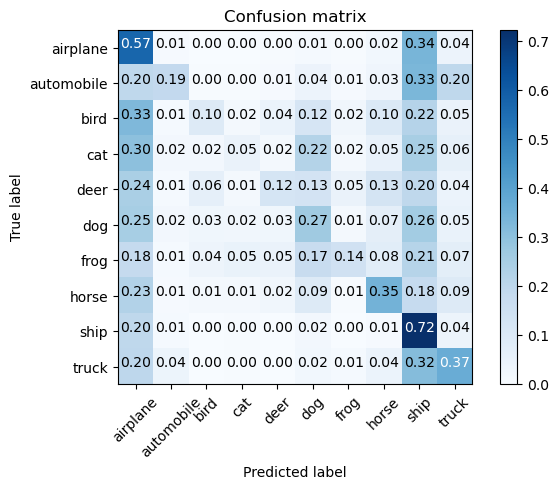

Confusion Matrix for random_forest
Normalized confusion matrix
[[3.39157246e-02 0.00000000e+00 9.65056526e-01 1.02774923e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.10725230e-02 0.00000000e+00 9.45863126e-01 1.02145046e-03
  0.00000000e+00 2.04290092e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.59223301e-02 0.00000000e+00 9.62135922e-01 0.00000000e+00
  0.00000000e+00 1.94174757e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.91006843e-02 0.00000000e+00 9.59921799e-01 9.77517107e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.71489818e-02 0.00000000e+00 9.80707395e-01 2.14362272e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.66009852e-02 0.00000000e+00 9.67487685e-01 1.97044335e-03
  0.00000000e+00 3.94088670e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e

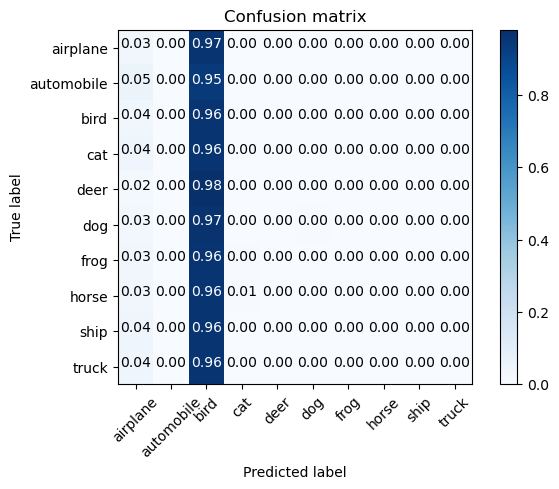

In [18]:
for model_type, result in results.items():
    print(f"Confusion Matrix for {model_type}")
    plot_confusion_matrix(result['confusion_matrix'], LABEL_NAMES, normalize=True)
    plt.show()

Conclusion
Summarize findings and highlight the best performing model

In [19]:
best_model_type = max(results, key=lambda x: results[x]['accuracy'])
print(f"The best performing model is {best_model_type} with an accuracy of {results[best_model_type]['accuracy']:.2f}")


The best performing model is logistic with an accuracy of 0.29
